In [7]:
import numpy as np
from scipy.optimize import linear_sum_assignment
import pandas as pd


gen = pd.read_csv('generated.csv')
gen.describe()

,MW,Synthetic
count,8760.000000,8760.000000
mean,21.131278,5.474066
std,25.093979,3.128487
min,0.000000,0.076736
25%,1.622786,3.154657
50%,8.418022,4.993666
75%,33.563310,7.172275
max,79.553982,28.083622


In [8]:
from math import cos, radians, pi
import random

synt0 = gen[['Synthetic']].copy()
synt = gen[['Synthetic']].copy()

hasta = 0
a = 0
b = random.randint(20, 32)
while True:
  hasta = a+b
  syn = synt.iloc[a:a+b].copy()
  c = random.randint(12, 24)
  d = []
  y = 0
  for index, row in syn.iterrows():
    d.append({})
    i = 0
    for n in range(1,syn.shape[0]+1):
      i += 1
      pat = (1+cos((2*pi/syn.shape[0])*(i-c)))/2
      nor = row['Synthetic']/syn['Synthetic'].max()
      d[y][n-1] = abs(pat**2 - nor**2) #abs(pat - nor) #(pat - nor)**2
      if(index % syn.shape[0] == 0):
        i = 0
    y += 1      
  d = pd.DataFrame(d).T
  row_ind, col_ind = linear_sum_assignment(d.values)
  z = 0
  for index in col_ind:
    synt.loc[a+z,'Synthetic'] = syn.loc[index+a,'Synthetic']
    z += 1
  a = a + b
  if a >= synt.shape[0]:
    break
  b = random.randint(20, 26)
  if(a + b > synt.shape[0]):
    b = synt.shape[0]  - a

In [9]:
synt.to_csv(path_or_buf='final.csv', index=False)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(25, 9)})

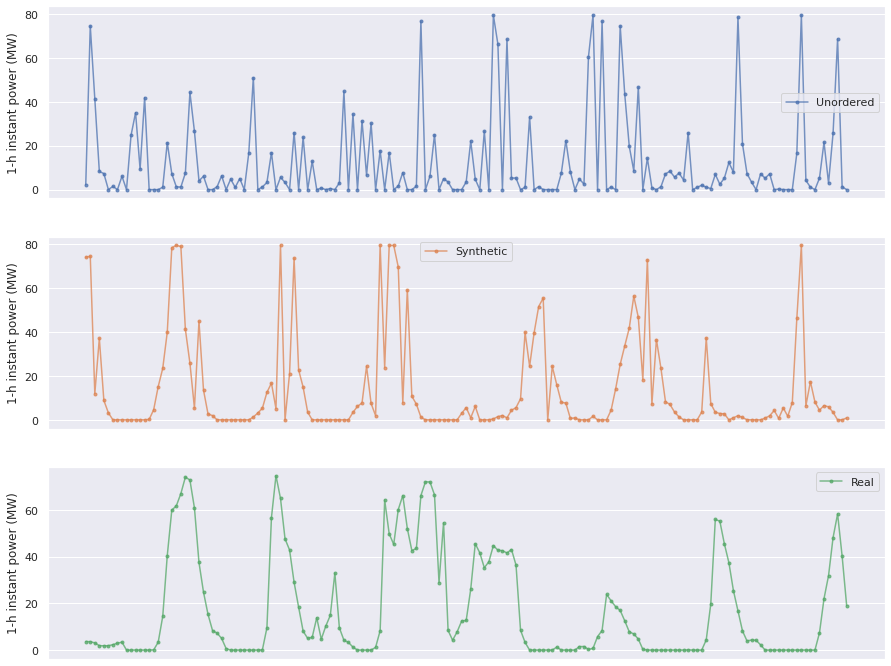

In [11]:
com = pd.read_csv('compared.csv')

partir = 168

cols_plot = ['Unordered','Synthetic','Real']
axes = com.loc[partir:partir+168,cols_plot].plot(marker='.', alpha=0.75, linestyle='-', figsize=(15, 12), subplots=True)
for ax in axes:
  ax.set_xticks([])
  ax.set_ylabel('1-h instant power (MW)')

In [12]:
com.describe()

,Unordered,Synthetic,Real
count,8760.000000,8760.000000,8760.000000
mean,20.445096,19.944810,21.131278
std,26.894920,26.520530,25.093979
min,0.000000,0.000000,0.000000
25%,0.324706,0.471621,1.622786
50%,6.541627,6.518429,8.418022
75%,31.301598,28.071295,33.563310
max,79.553982,79.553982,79.553982
